## SVM(Support Vector Mahcine)
* 개념소개
    * svm은 기계학습모델 중 하나이다.
    * 지도학습(Supervised Learning) 모델이며 주로 분류나 회귀분석에 사용된다.


* svm의 구성요소와 정의
    * svm에서 Support Vector는 경계에서 가장 가까운 각 클래스의 데이터점을 의미한다.
    * 점선으로 된 점과 만나는 데이터 점들이 바로 서포트 벡터이다.
    * svm은 support vector들과 최대한 멀리 있는 경계를 찾는 일을 한다. 이러한 경계를 svm에서는 초평면이라고 한다.

* Soft margin(소프트 마진)
    * 모든 문제들이 하나의 선으로 완벽하게 나누어지지 않을 뿐만 아니라, 무리하게 완벽하게 나누다보면 쉽게 결과가 overfitting되거나 margin이 굉장히 작아지게 된다. 이러한 문제를 해결하기 위해서 Generalization(일반화)가 필요하다.
    * svm 알고리즘에서는 일반화를 위해서 Soft margin이라는 개념을 사용한다.
    * 분류 오류 없이 나누는 것을 하드마진(Hard margin)이라고 하고 margin을 최대로 하면서 동시에 분류 오류를 어느 정도 인정하는 것을 소프트마진(soft margin)이라 한다.

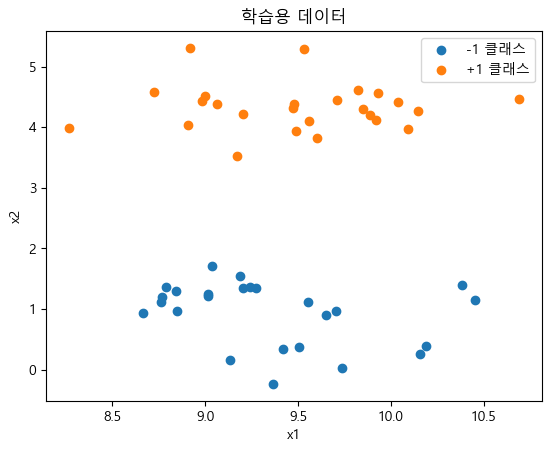

In [1]:
# svm 연습 예제

#make_blobs(): 분류용 가상 데이터 생성 함수

from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
x,y = make_blobs(n_samples=50, centers=2,cluster_std=0.5,random_state=4)
y = 2*y - 1
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.scatter(x[y== -1, 0],x[y == -1,1], marker='o', label='-1 클래스')
plt.scatter(x[y== +1, 0],x[y == +1,1], marker='o', label='+1 클래스')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.title('학습용 데이터')
plt.show()

In [2]:
from sklearn.svm import SVC
#슬랙변수(c) : 잘못 분류된 데이터로부터 해당 클래스의 결정 경곅까지의 거리로 데이터점이 잘못 분류된 정도를 나타낸다.
#커널(kernel) : 판별 경계를 찾기 위한 내적 함수
model = SVC(kernel='linear', C=1e10).fit(x,y)
model

SVC(C=10000000000.0, kernel='linear')

c:\Project\AI_Source\AI_01\venv\lib\site-packages\ipykernel_launcher.py:24: UserWarning: The following kwargs were not used by contour: 'linestyle'


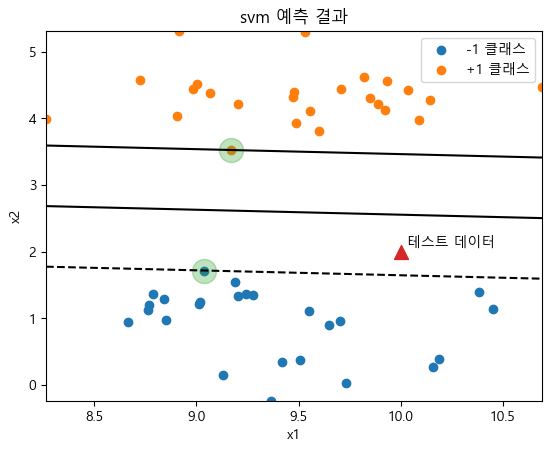

array([-0.61101582])

In [3]:
#예측 결과
import numpy as np
xmin = x[:,0].min()
xmax = x[:,0].max()
ymin = x[:,1].min()
ymax = x[:,1].max()

xx = np.linspace(xmin, xmax, 10)
yy = np.linspace(ymin, ymax, 10)
x1, x2 = np.meshgrid(xx,yy)
z = np.empty(x1.shape)

for (i,j), val in np.ndenumerate(x1):
    z1 = val
    z2 = x2[i,j]
    p = model.decision_function([[z1,z2]])
    z[i,j] = p[0]

levels = [-1,0,1]
linestyle = ['dashed','solid','dashed']

plt.scatter(x[y== -1, 0],x[y == -1,1], marker='o', label='-1 클래스')
plt.scatter(x[y== +1, 0],x[y == +1,1], marker='o', label='+1 클래스')
plt.contour(x1,x2,z,levels, colors='k', linestyle=linestyle)
plt.scatter(model.support_vectors_[:,0], model.support_vectors_[:,1], s=300, alpha=0.3)

x_new = [10,2]
plt.scatter(x_new[0], x_new[1], marker='^', s=100)
plt.text(x_new[0] + 0.03, x_new[1] + 0.08, '테스트 데이터')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.title('svm 예측 결과')
plt.show()

x_new = [10,2]
model.decision_function([x_new])
model.coef_.dot(x_new) + model.intercept_

### svc 파라메터
* C
    * 잘못 분류된 데이터로부터 해당 클래스의 결정 경계까지의 거리로 데이터점이 잘못 분류된 정도를 나타낸다.
    * SVM 모델이 오류를 어느정도 허용할 것인지 파라미터 C를 통해 지정
    * 값이 클수록 하드마진(오류 허용 안 함), 작을수록 소프트마진(오류를 허용함)이다.

* gamma
    * 결정 경계를 얼마나 유연하게 그을 것인지 정해주는 역할
    * gamma 값을 높이면 학습 데이터에 많이 의존해서 결정 경계를 구불구불 긋게 된다. 오버피팅을 초래
    * gamma값을 낮추면 학습 데이터에 별로 의존하지 않고 결정 경계를 직선에 가깝게 긋게된다. 언더피팅 초래

* kernel
    * 판별 경계를 찾기위한 내적 함수. 'linear','poly','rbf','sigmoid','precomputed', default는 rbf

C와 gamma를 지나치게 높게 잡는다면 오버피팅이 될 수 있다.

### SVC를 사용하여 모형을 구하면 다음과 같은 속성값을 가진다.
* n_support_ : 각 클래스의 서포트 벡터의 개수
* support_ : 각 클래스의 서포트 벡터의 인덱스
* support_vectors_ : 각 클래스의 서포트의 x값
* coef_ : 기울기
* intercept_ : 절편
* dual_coef_ : 각 원소가 ai yi로 이루어진 벡터, 음과 계수와 양의 계수를 나타낸다.

In [4]:
print(model.support_)
print(model.support_vectors_)
print(y[model.support_])
print(model.intercept_)
print(model.dual_coef_)

[42  1]
[[9.03715314 1.71813465]
 [9.17124955 3.52485535]]
[-1  1]
[-3.62995208]
[[-0.60934379  0.60934379]]


In [14]:
# iris 데이터
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
iris = load_iris()
X_data = iris.data[(iris.target == 0) | (iris.target == 1), :2]
y = iris.target[(iris.target == 0) | (iris.target == 1)]
X_train, X_test, y_train, y_test = train_test_split(X_data, y, test_size=0.3,random_state=0)
svm = SVC(kernel="linear", C=1e10)
svm.fit(X_train, y_train)
pred_y = svm.predict(X_test)
confusion_matrix(pred_y, y_test)

array([[15,  0],
       [ 0, 15]], dtype=int64)

c:\Project\AI_Source\AI_01\venv\lib\site-packages\ipykernel_launcher.py:29: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
c:\Project\AI_Source\AI_01\venv\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


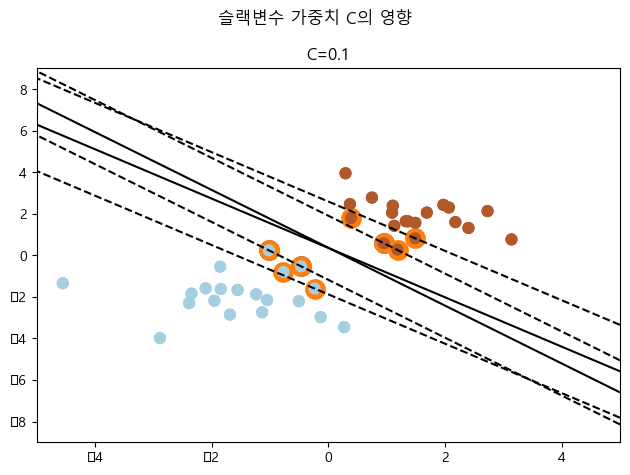

In [15]:
# 슬랙변수의 c값에 따라 오차 허용의 차이 테스트

np.random.seed(0)
x = np.r_[np.random.randn(20,2) - [2,2], np.random.randn(20,2) + [2,2]]
y = [-1] * 20 + [1] * 20
plotnum = 1

for name,penalty in (('C=10',10),('C=0.1',0.1)):
    clf = SVC(kernel='linear', C=penalty).fit(x,y)
    xx = np.linspace(-5,5)
    x_jin = -5
    x_jax = 5
    y_jin = -9
    y_jax = 9
    xx,yy = np.mgrid[x_jin:x_jax:200j, y_jin:y_jax:200j]
    levels = [-1,0,1]
    linestyles = ['dashed','solid','dashed']
    z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    z = z.reshape(xx.shape)
    plt.contour(xx, yy, z, levels, colors='k', linestyles=linestyles)
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=120, linewidth=4)
    plt.scatter(x[:, 0], x[:, 1], c=y, s=60, linewidth=1, cmap=plt.cm.Paired)
    plt.xlim(x_jin, x_jax)
    plt.ylim(y_jin, y_jax)
    plt.title(name)
    plotnum += 1

plt.suptitle("슬랙변수 가중치 C의 영향")
plt.tight_layout()
plt.show()


## svm 얼굴 인식

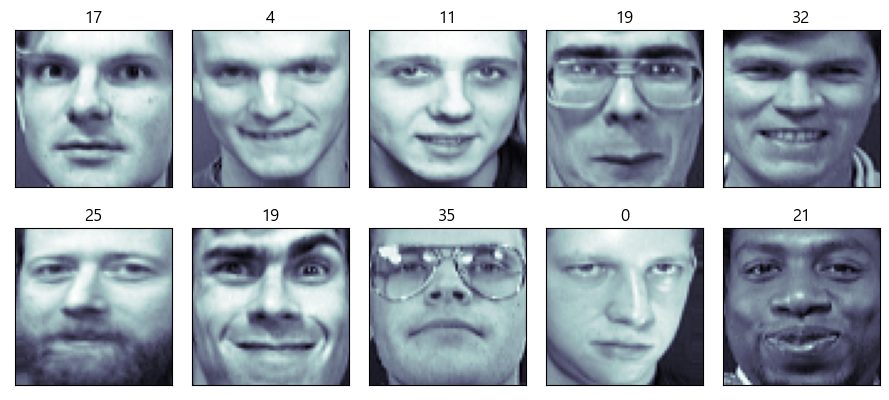

In [21]:
# 얼굴 이미지 인식
# 총 40명이 각각 10장의 조금씩 다른 표정이나 모습으로 찍은 이미지 데이터이다.
from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces()
N = 2
M = 5
np.random.seed(0)
fig = plt.figure(figsize=(9, 5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
klist = np.random.choice(range(len(faces.data)), N * M)
for i in range(N):
    for j in range(M):
        k = klist[i * M + j]
        ax = fig.add_subplot(N, M, i * M + j + 1)
        ax.imshow(faces.images[k], cmap=plt.cm.bone)
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.title(faces.target[k])
plt.tight_layout()
plt.show()

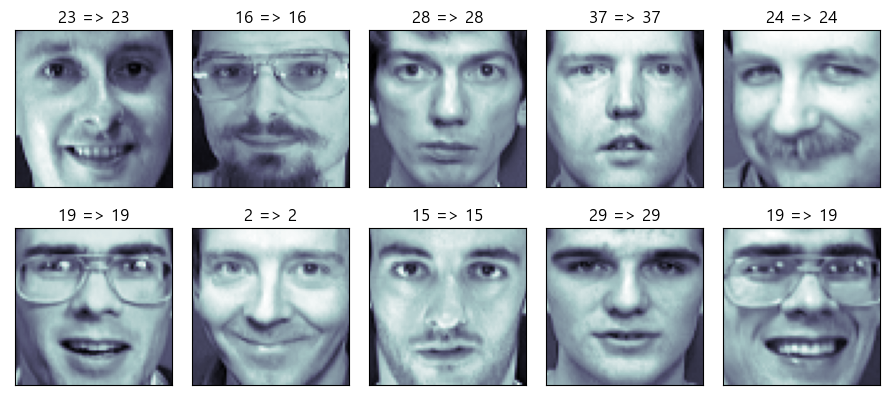

In [19]:
# 랜덤하게 뽑은 이미지
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(faces.data, faces.target, test_size=0.4, 
random_state=0)
from sklearn.svm import SVC
svc = SVC(kernel='linear').fit(X_train, y_train)
N = 2
M = 5
np.random.seed(4)
fig = plt.figure(figsize=(9, 5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
klist = np.random.choice(range(len(y_test)), N * M)
for i in range(N):
    for j in range(M):
        k = klist[i * M + j]
        ax = fig.add_subplot(N, M, i * M + j + 1)
        ax.imshow(X_test[k:(k + 1), :].reshape(64, 64), cmap=plt.cm.bone)
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.title("%d => %d" %
        (y_test[k], svc.predict(X_test[k:(k + 1), :])[0]))
plt.tight_layout()
plt.show()

In [24]:
# 랜덤하게 뽑은 이미지의 예측
from sklearn.metrics import classification_report, accuracy_score

y_pred_train = svc.predict(X_train)
y_pred_test = svc.predict(X_test)

print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         4
           7       1.00      1.00      1.00         7
           8       1.00      1.00      1.00         8
           9       1.00      1.00      1.00         7
          10       1.00      1.00      1.00         4
          11       1.00      1.00      1.00         6
          12       1.00      1.00      1.00         6
          13       1.00      1.00      1.00         6
          14       1.00      1.00      1.00         4
          15       1.00      1.00      1.00         4
          16       1.00      1.00      1.00         8
          17       1.00    

In [72]:
from sklearn import svm, metrics
from sklearn.model_selection import train_test_split
import pandas as pd

df = pd.read_csv('../../../AI머신러닝데이터/bmi.csv')
x = df.iloc[:,:-1]
y = df.iloc[:,2:]
y

,label
0,fat
1,fat
2,normal
3,thin
4,fat
...,...
19995,fat
19996,normal
19997,thin
19998,thin


In [73]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

encoder = LabelEncoder()
scaler = MinMaxScaler()

# height = scaler.fit_transform(x[['height']])
# weight = scaler.fit_transform(x[['weight']])
# x['height'] = height
# x['weight'] = weight

yencoder = encoder.fit_transform(y[['label']])
y['label'] = yencoder
x


c:\Project\AI_Source\AI_01\venv\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Project\AI_Source\AI_01\venv\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


,height,weight
0,142,62
1,142,73
2,177,61
3,187,48
4,153,60
...,...,...
19995,122,58
19996,193,69
19997,193,37
19998,195,51


In [78]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)
svc = SVC().fit(x_train,y_train)
y_pred = svc.predict(x_test)

print(classification_report(y_test, y_pred))
print(accuracy_score(y_test,y_pred))


c:\Project\AI_Source\AI_01\venv\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       1.00      0.99      1.00      2120
           1       0.99      0.99      0.99      1924
           2       0.99      1.00      0.99      1956

    accuracy                           0.99      6000
   macro avg       0.99      0.99      0.99      6000
weighted avg       0.99      0.99      0.99      6000

0.9926666666666667
